In [1]:
from fastai.vision.all import *

/home/studio-lab-user/.conda/envs/fastai/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


In [2]:
path = untar_data(URLs.PETS)/'images'

In [3]:
print(path)

/home/studio-lab-user/.fastai/data/oxford-iiit-pet/images


In [4]:
def is_cat(x): return x[0].isupper()

In [5]:
dls = ImageDataLoaders.from_name_func(
    path,
    get_image_files(path),
    valid_pct=0.2,
    seed=0,
    label_func=is_cat,
    item_tfms=Resize(224)
)

In [6]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

/home/studio-lab-user/.conda/envs/fastai/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/studio-lab-user/.conda/envs/fastai/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [7]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.145839,0.015837,0.004736,00:31


epoch,train_loss,valid_loss,error_rate,time
0,0.053580,0.013663,0.004736,00:33


In [8]:
cat = './images/cat.jpg'
dog = './images/dog.jpg'

In [9]:
uploader = SimpleNamespace(data = [cat])

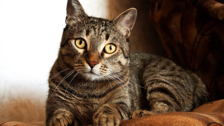

In [10]:
PILImage.create(cat).to_thumb(h=224)

In [11]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


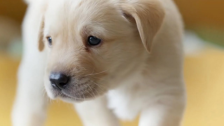

In [12]:
uploader = SimpleNamespace(data = [dog])
PILImage.create(dog).to_thumb(h=224)

In [13]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: False.
Probability it's a cat: 0.000000
